# Horn Radio Telescope Spectrum Integration "Example

### Glen Langston, 2022 February 9

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# find out your current directory
!pwd
# now add one directory up to find packages 
import sys
sys.path.append("../")

/Users/glangsto/Desktop/Research/jupyter/integrate


In [2]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [3]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
p = ras.Plot()
p.help("-R -C -I 600.")

Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:    600.0 s


In [10]:
datadir = "/Volumes/jansky/pi16-data-22Jan10"

In [11]:
# get a list of all files in the data directory.  The data are up a directory 

# "data" look in the 'data' directory for the observations
hotfiles, counthot = rasnames.splitNames(datadir, ".hot", "", doDebug=False)
astfiles, countast = rasnames.splitNames(datadir, ".ast", "", doDebug=False)
print("Found %d hot files and %d sky observations" % (counthot, countast))
print("Files: %s to %s " % ( hotfiles[0], hotfiles[counthot-1]))
print("Files: %s to %s " % ( astfiles[0], astfiles[countast-1]))

#names = p.help("-R -C -V -I 3600. "+datadir)
# show the list of fine names found

Found 163 hot files and 380 sky observations
Files: /Volumes/jansky/pi16-data-22Jan10/22-01-10T045516.hot to /Volumes/jansky/pi16-data-22Jan10/22-01-10T115956.hot 
Files: /Volumes/jansky/pi16-data-22Jan10/22-01-10T122055.ast to /Volumes/jansky/pi16-data-22Jan10/22-01-11T045426.ast 


Ploting Intensity versus Frequency
Date: 2022-01-10
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
05:05:45   0.0,-45.0   39.5,  1.5    6.343    5.284    112500
05:18:51   0.0,-45.0   41.0, -1.4    6.359    5.299    112500
05:31:58   0.0,-45.0   42.5, -4.3    6.376    5.317    112500
05:45:04   0.0,-45.0   44.0, -7.1    6.397    5.320    112500
05:58:11   0.0,-45.0   45.6,-10.0    6.387    5.323    112500
06:11:17   0.0,-45.0   47.2,-12.9    6.382    5.319    112500
06:24:23   0.0,-45.0   48.9,-15.7    6.380    5.320    112500
06:37:30   0.0,-45.0   50.6,-18.5    6.373    5.320    112500
06:50:36   0.0,-45.0   52.5,-21.3    6.371    5.317    112500
07:03:43   0.0,-45.0   54.4,-24.0    6.381    5.320    112500
07:16:49   0.0,-45.0   56.4,-26.7    6.395    5.329    112500
07:29:56   0.0,-45.0   58.5,-29.4    6.407    5.341    112500
07:43:02   0.0,-45.0   60.8,-32.0    6.437    5.362    112500
07:56:08   0.0,-45.0   63.2,-34.6    6.445    5.379    112500
08:09:15   0.0,-4

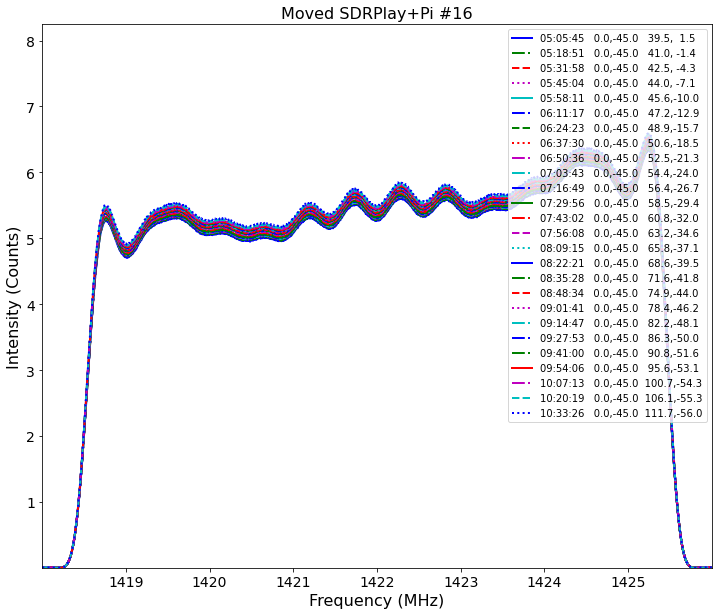

In [6]:
# first just plot a few spectra
# Hot observations are above the Cold observations
# Optionally plot the raw files 
files = astfiles + hotfiles
#print(files)
p.raw(files)

In [7]:
# For observatories with multiple telescopes need to set an index for this telescope
telIndex = 16

In [34]:
# prepare to integrate
p3 = ras.Plot()
p3.help("-R -C -I 3600. -X %d -V -K keep " % (telIndex))

# show the list of fine nams found

Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:   3600.0 s
Telescope Index: 16
Plotting intensity versus Velocity
Keeping averages in directory: keep/


Found 163 Hot load observations
Ave Hot: 2048: 5.473522
Wrote Average Hot  Load File: keep/T16-22-01-10T082736.hot
Ave Cold: 2048: 2.179122
Wrote Average Cold Load File: keep/T16-22-01-10T122055.ast
Found 57 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  178.52 +/-  0.24 ( 0.36  0.12) (K)
Ploting Intensity versus Velocity
Date: 2022-01-10
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
13:21:12   0.0, 80.0   84.0, 58.5   190.63   187.48   -22.185   540000
14:24:07   0.0, 80.0   76.9, 49.0   193.21   189.08   -23.010   540000
15:27:02   0.0, 80.0   74.8, 38.6   194.08   189.34   -16.325   540000
16:29:57   0.0, 80.0   75.7, 28.2   194.95   186.95   -21.201   540000
17:32:52   0.0, 80.0   78.7, 18.1   199.50   183.88   -14.189   540000
18:35:47   0.0, 80.0   83.3,  8.7   218.24   182.93   -15.501   540000
19:38:42   0.0, 80.0   89.6,  0.3   229.77   184.11   -12.362   540000
20:41:37   0.0, 80.0   97.4, -6.6   220.75   183.96   -14.285

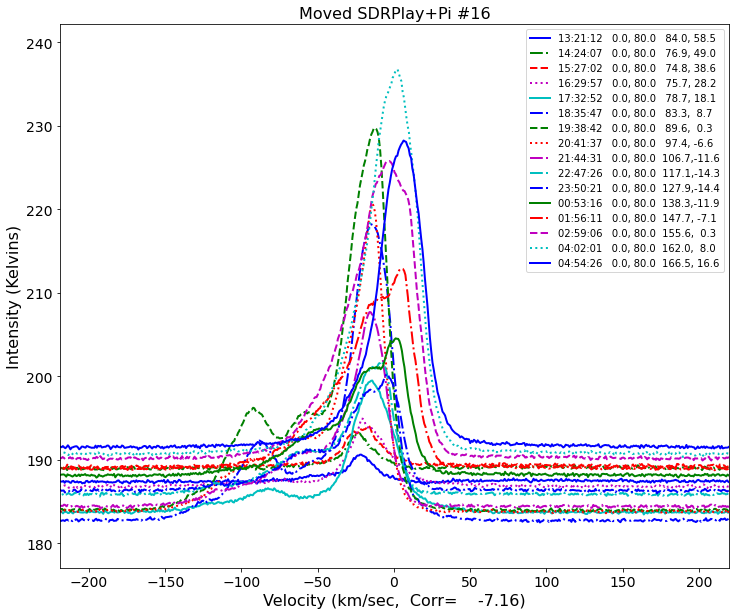

In [35]:
p3.tsys(files)

In [21]:
# get the hot and cold files just created and "kept" in directory
keepdir = "keep"
hotfiles, count = rasnames.splitNames(keepdir, ".hot", "", doDebug=False)
coldfiles, count = rasnames.splitNames(keepdir, ".ast", "", doDebug=False)
# calibrate all the data with these files
p4 = ras.Plot()
controlstr = "-R -C -I 600. -V -A %s %s" % (hotfiles[0], coldfiles[0])
print(controlstr)
p4.help(controlstr)
print("Hot average: %s;  Cold average: %s" % (p4.hotfilename, p4.coldfilename))

-R -C -I 600. -V -A keep/T0-22-01-10T045516.hot keep/T0-22-01-10T122055.ast
Flagging RFI
Interpolate center of spectra
Spectral integration time for averaging:    600.0 s
Plotting intensity versus Velocity
Calibrating with keep/T0-22-01-10T045516.hot and keep/T0-22-01-10T122055.ast
Hot average: keep/T0-22-01-10T045516.hot;  Cold average: keep/T0-22-01-10T122055.ast


Telescope Index: 16
Ploting Intensity versus Frequency
Date: 2022-01-10
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
08:27:36   0.0,-45.0   71.0,-41.3    6.487    5.415   3667500
12:20:55   0.0, 80.0   90.3, 62.5    2.591    2.159   1282500


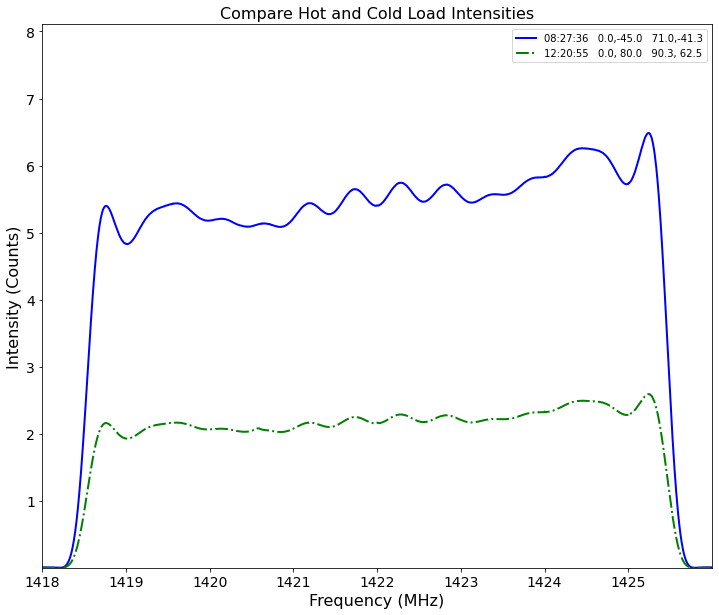

In [44]:
rawplot = ras.Plot()
rawplot.help('-X 16')
rawplot.myTitle = "Compare Hot and Cold Load Intensities"
files, count = rasnames.splitNames( keepdir)
rawplot.raw(files)

Telescope Index: 16
Found   1 Hot load observations
Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  178.52 +/-  0.24 ( 0.36  0.12) (K)
Ploting Intensity versus Frequency
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (MHz)  Count 
12:20:55   0.0, 80.0   90.3, 62.5   245.82   188.61  1418.207  1282500


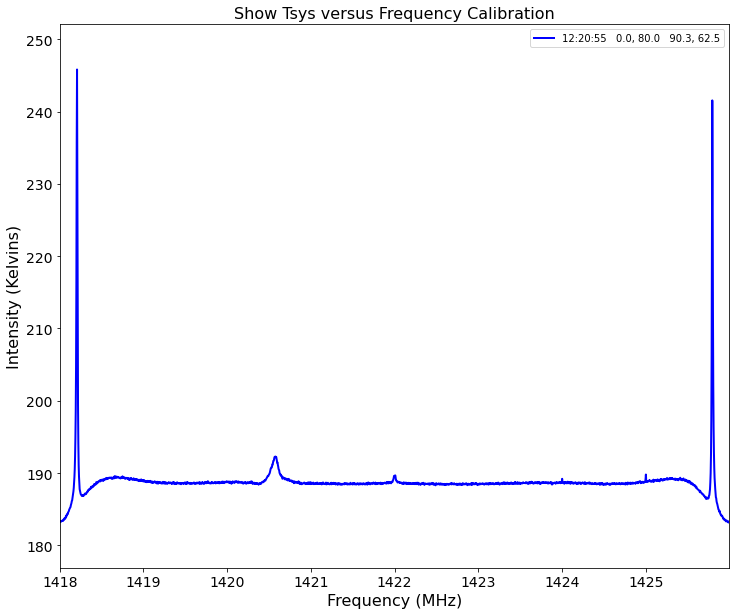

In [45]:
#Next look at the resulting system temperature plot
awplot = ras.Plot()
rawplot.help('-X 16')
rawplot.myTitle = "Show Tsys versus Frequency Calibration"
rawplot.tsys(files)

Plotting intensity versus Velocity
Fitting and subtracking a baseline
Found   1 Hot load observations
Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  178.52 +/-  0.24 ( 0.36  0.12) (K)
Ploting Intensity versus Velocity
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
12:20:55   0.0, 80.0   90.3, 62.5     3.67     0.04   -20.451  1282500


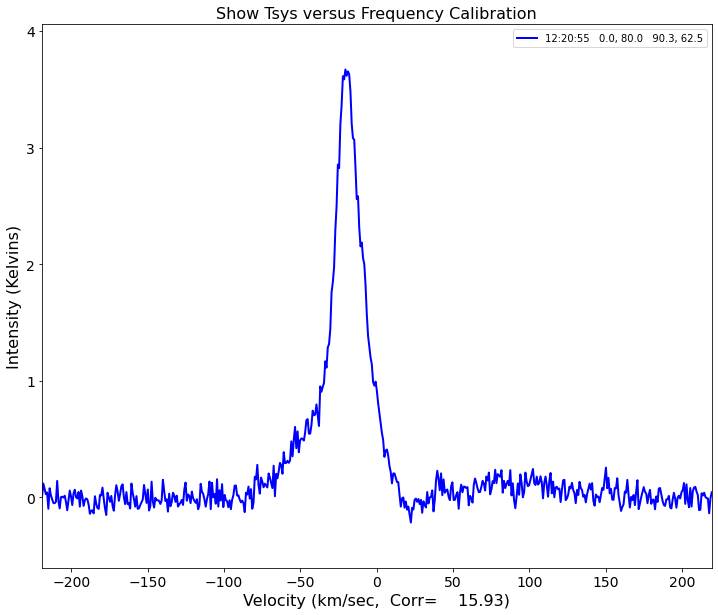

In [48]:
# now look at the intensity near hydrogen emission
rawplot.help("-V -BASE")
rawplot.tsys(files)

# Congratulations!
## You've saved the Calibration spectra from your observations.

In [50]:
print("Your spectra are in the directory: %s" % (keepdir))

Your spectra are in the directory: keep


In [52]:
# Use the shell to list the files kept
!ls {keepdir}

T16-22-01-10T082736.hot T16-22-01-10T122055.ast
